**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
print(dir(fdiry))

[1] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"                              
[2] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.ccre_all.bed.gz"                  
[3] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_astarr.bed.gz"
[4] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_wstarr.bed.gz"
[5] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.gencode_v24_tss.bed.gz"           
[6] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz"                       
[7] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.remap2022_nr.bed.gz"              
[8] "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"                                                    
[9] "KS91_K562_hg38_ASTARRseq_Input.remap2022_nr.tsv"                                                     


In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.ccre_all.bed.gz"
fpath = file.path(fdiry, fname)


### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_CCRE", "Start_CCRE", "End_CCRE", "Name", "Score", "Strand", 
           "thickStart_CCRE", "thickStop_CCRE", "Reserved", "CCRE", "Source",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))

### assign
dat_peak_annot_ccre = dat
print(dim(dat))
head(dat)

[1] 165907     16


Chrom,Start,End,Chrom_CCRE,Start_CCRE,End_CCRE,Name,Score,Strand,thickStart_CCRE,thickStop_CCRE,Reserved,CCRE,Source,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,180982,182087,chr1,181251,181601,EH38E1310153,0,.,181251,181601,"6,218,147",DNase-only,All-data/Full-classification,350,chr1_180982_182087
chr1,777949,779437,chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification,350,chr1_777949_779437
chr1,777949,779437,chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification,269,chr1_777949_779437
chr1,816774,817547,chr1,817080,817403,EH38E1310166,0,.,817080,817403,"225,225,225",Low-DNase,All-data/Full-classification,323,chr1_816774_817547
chr1,818602,819380,chr1,818718,818872,EH38E1310168,0,.,818718,818872,"225,225,225",Low-DNase,All-data/Full-classification,154,chr1_818602_819380
chr1,819732,820291,chr1,819893,820227,EH38E1310170,0,.,819893,820227,"225,225,225",Low-DNase,All-data/Full-classification,334,chr1_819732_820291


In [4]:
summary(dat_peak_annot_ccre$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

In [5]:
###
dat = dat_peak_annot_ccre
dat = dat %>% 
    dplyr::select(Peak, CCRE) %>% 
    dplyr::rename(Name = CCRE)

###
dat = dat %>% 
    group_by(Peak, Name) %>% 
    summarize(Count = n(), .groups="drop")

###
dat = dat %>%
    group_by(Peak) %>%
    mutate(Total = sum(Count)) %>%
    mutate(Freq  = Count / Total)

###
dat_peak_count_ccre = dat
print(dim(dat))
head(dat)

[1] 120179      5


Peak,Name,Count,Total,Freq
<chr>,<chr>,<int>,<int>,<dbl>
chr1_100027983_100029702,Low-DNase,1,1,1.0000000
chr1_100036871_100039191,Low-DNase,2,6,0.3333333
chr1_100036871_100039191,pELS,3,6,0.5000000
chr1_100036871_100039191,PLS,1,6,0.1666667
chr1_100048234_100048985,Low-DNase,1,1,1.0000000
chr1_100049562_100050540,Low-DNase,1,1,1.0000000


In [8]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.count.ccre_all.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_peak_count_ccre, fpath)

In [20]:
fdiry = file.path(FD_RES, "results", "Tewhey_K562_TileMPRA", "coverage_astarrseq_peak_macs_input", "summary")
print(dir(fdiry))

 [1] "matrix.norm.count.FADS.tsv"        "matrix.norm.count.GATA1.tsv"      
 [3] "matrix.norm.count.MYC.tsv"         "matrix.norm.cpm.FADS.tsv"         
 [5] "matrix.norm.cpm.GATA1.tsv"         "matrix.norm.cpm.MYC.tsv"          
 [7] "matrix.raw.count.FADS.tsv"         "matrix.raw.count.GATA1.tsv"       
 [9] "matrix.raw.count.MYC.tsv"          "matrix.raw.cpm.FADS.tsv"          
[11] "matrix.raw.cpm.GATA1.tsv"          "matrix.raw.cpm.MYC.tsv"           
[13] "metadata.norm.FADS.tsv"            "metadata.norm.GATA1.tsv"          
[15] "metadata.norm.MYC.tsv"             "metadata.raw.FADS.tsv"            
[17] "metadata.raw.GATA1.tsv"            "metadata.raw.MYC.tsv"             
[19] "peak_regions.tsv"                  "result.Log2FC.norm.cpm.FADS.tsv"  
[21] "result.Log2FC.norm.cpm.GATA1.tsv"  "result.Log2FC.norm.cpm.MYC.tsv"   
[23] "result.Log2FC.raw.cpm.FADS.tsv"    "result.Log2FC.raw.cpm.GATA1.tsv"  
[25] "result.Log2FC.raw.cpm.MYC.tsv"     "result.Log2FC.raw.deseq.FADS.tsv" 

In [21]:
ASSAY  = "Tewhey_K562_TileMPRA"
FOLDER = "coverage_astarrseq_peak_macs_input"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "peak_regions.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


In [27]:
peaks = dat_region$Peak
length(peaks)

[1] 417

In [40]:
dat = dat_peak_freq_ccre %>% 
    dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak, CCRE) %>%
    dplyr::mutate(Label = 1) %>%
    tidyr::spread(CCRE, Label)

dat = left_join(dat_region, dat, by = "Peak")
dat = replace(dat, is.na(dat), 0)

dat_peak_ccre_sub = dat
print(dim(dat))
head(dat)

[1] 417  16


Chrom,Start,End,Peak,Region,"CTCF-only,CTCF-bound",dELS,"dELS,CTCF-bound",DNase-H3K4me3,"DNase-H3K4me3,CTCF-bound",DNase-only,Low-DNase,pELS,"pELS,CTCF-bound",PLS,"PLS,CTCF-bound"
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,0,0,0,0,0,0,0,0,0,0,0
chr8,126782925,126783318,chr8_126782925_126783318,MYC,0,0,0,0,0,0,0,0,0,0,0
chr8,126804776,126805825,chr8_126804776_126805825,MYC,0,0,0,0,0,1,0,0,0,0,0
chr8,126817018,126817490,chr8_126817018_126817490,MYC,0,0,0,0,0,0,0,0,0,0,0
chr8,126820465,126821393,chr8_126820465_126821393,MYC,1,0,0,0,0,0,1,0,0,0,0
chr8,126824093,126824987,chr8_126824093_126824987,MYC,1,0,0,0,0,0,0,0,0,0,0


In [48]:
dat = dat_peak_ccre_sub
dat = dat %>% 
    gather(CCRE, Label, -Chrom, -Start, -End, -Peak, -Region) %>%
    mutate(Label = as.character(Label))
head(dat)

Chrom,Start,End,Peak,Region,CCRE,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,"CTCF-only,CTCF-bound",0
chr8,126782925,126783318,chr8_126782925_126783318,MYC,"CTCF-only,CTCF-bound",0
chr8,126804776,126805825,chr8_126804776_126805825,MYC,"CTCF-only,CTCF-bound",0
chr8,126817018,126817490,chr8_126817018_126817490,MYC,"CTCF-only,CTCF-bound",0
chr8,126820465,126821393,chr8_126820465_126821393,MYC,"CTCF-only,CTCF-bound",1
chr8,126824093,126824987,chr8_126824093_126824987,MYC,"CTCF-only,CTCF-bound",1


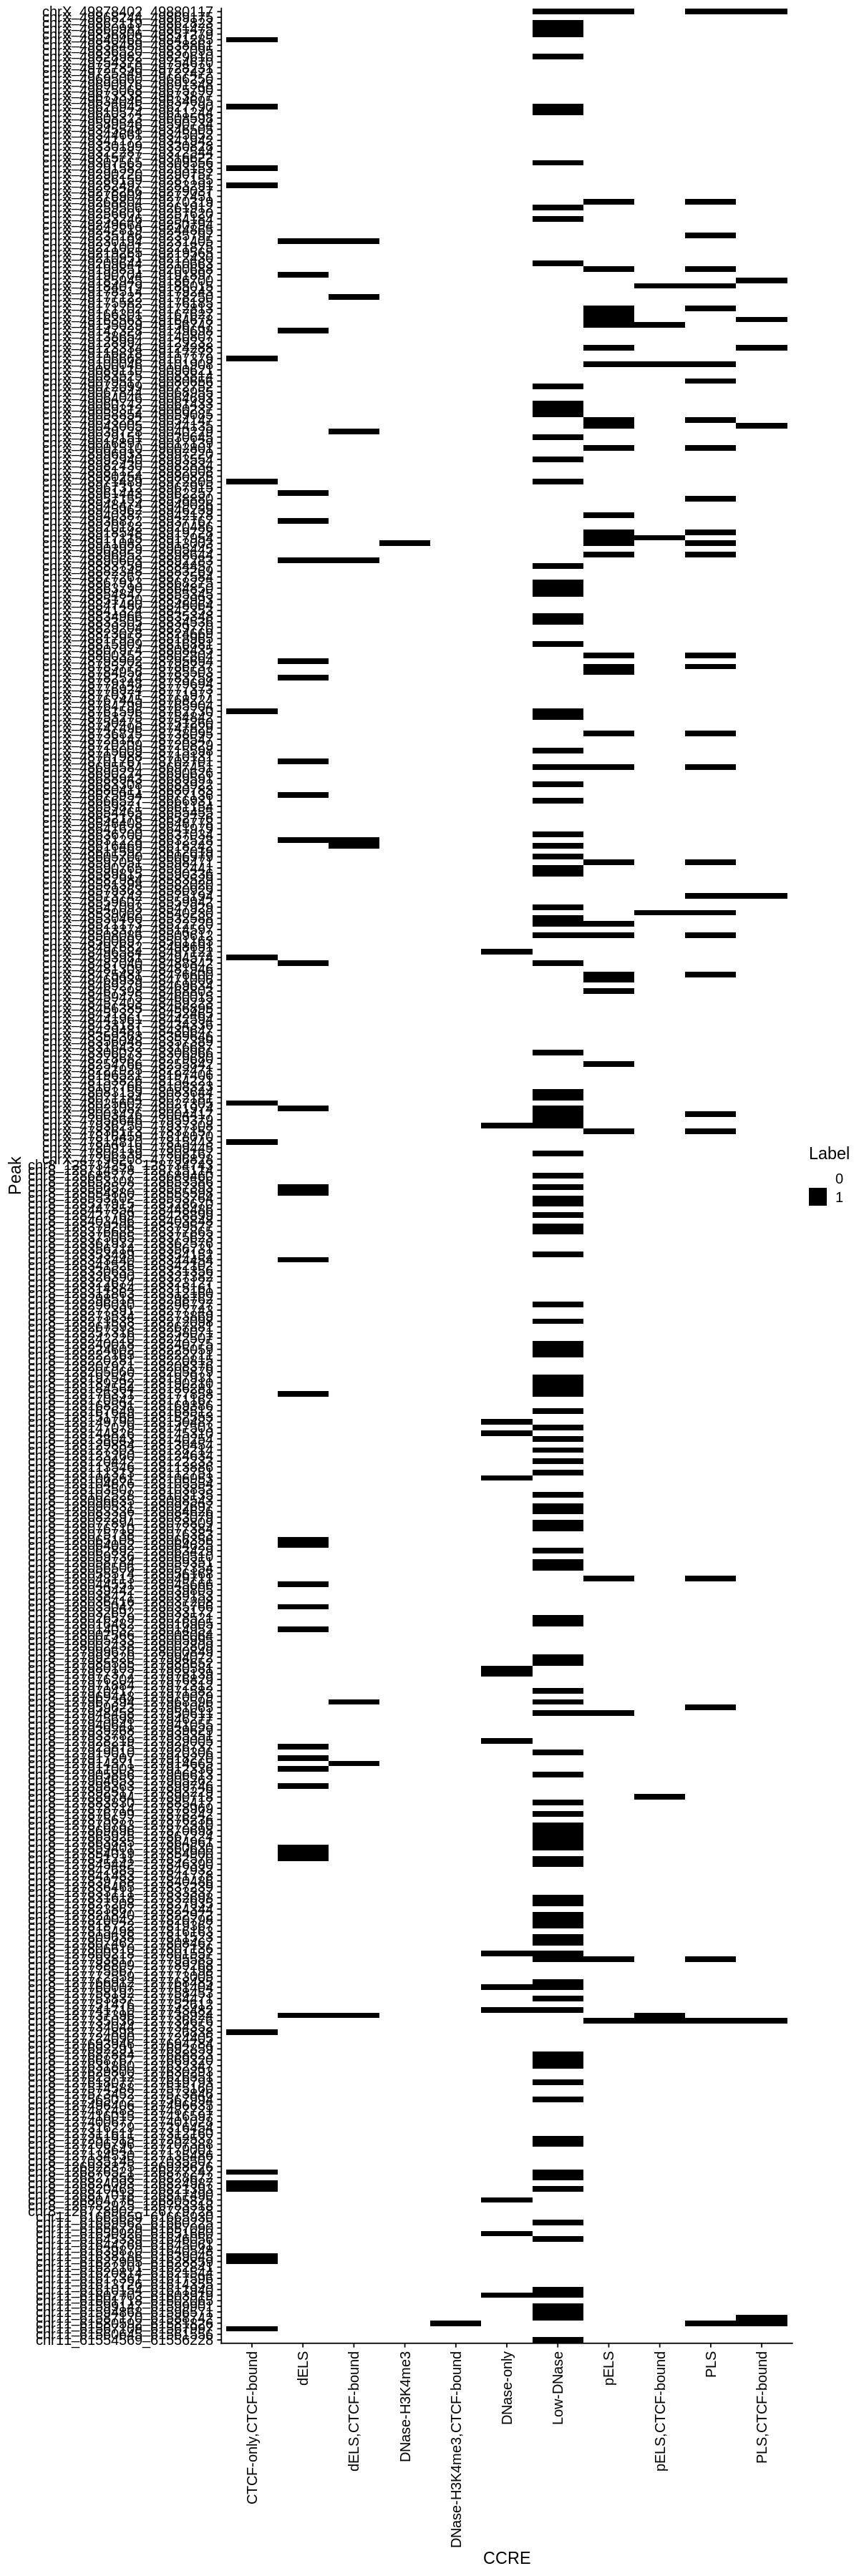

In [49]:
gpt = ggplot(dat, aes(x=CCRE, y=Peak, fill=Label)) +
    geom_tile() +
    theme_cowplot() +
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_manual(values = c("1" = "black", "0" = "white"))

options(repr.plot.height=30, repr.plot.width=10)
print(gpt)

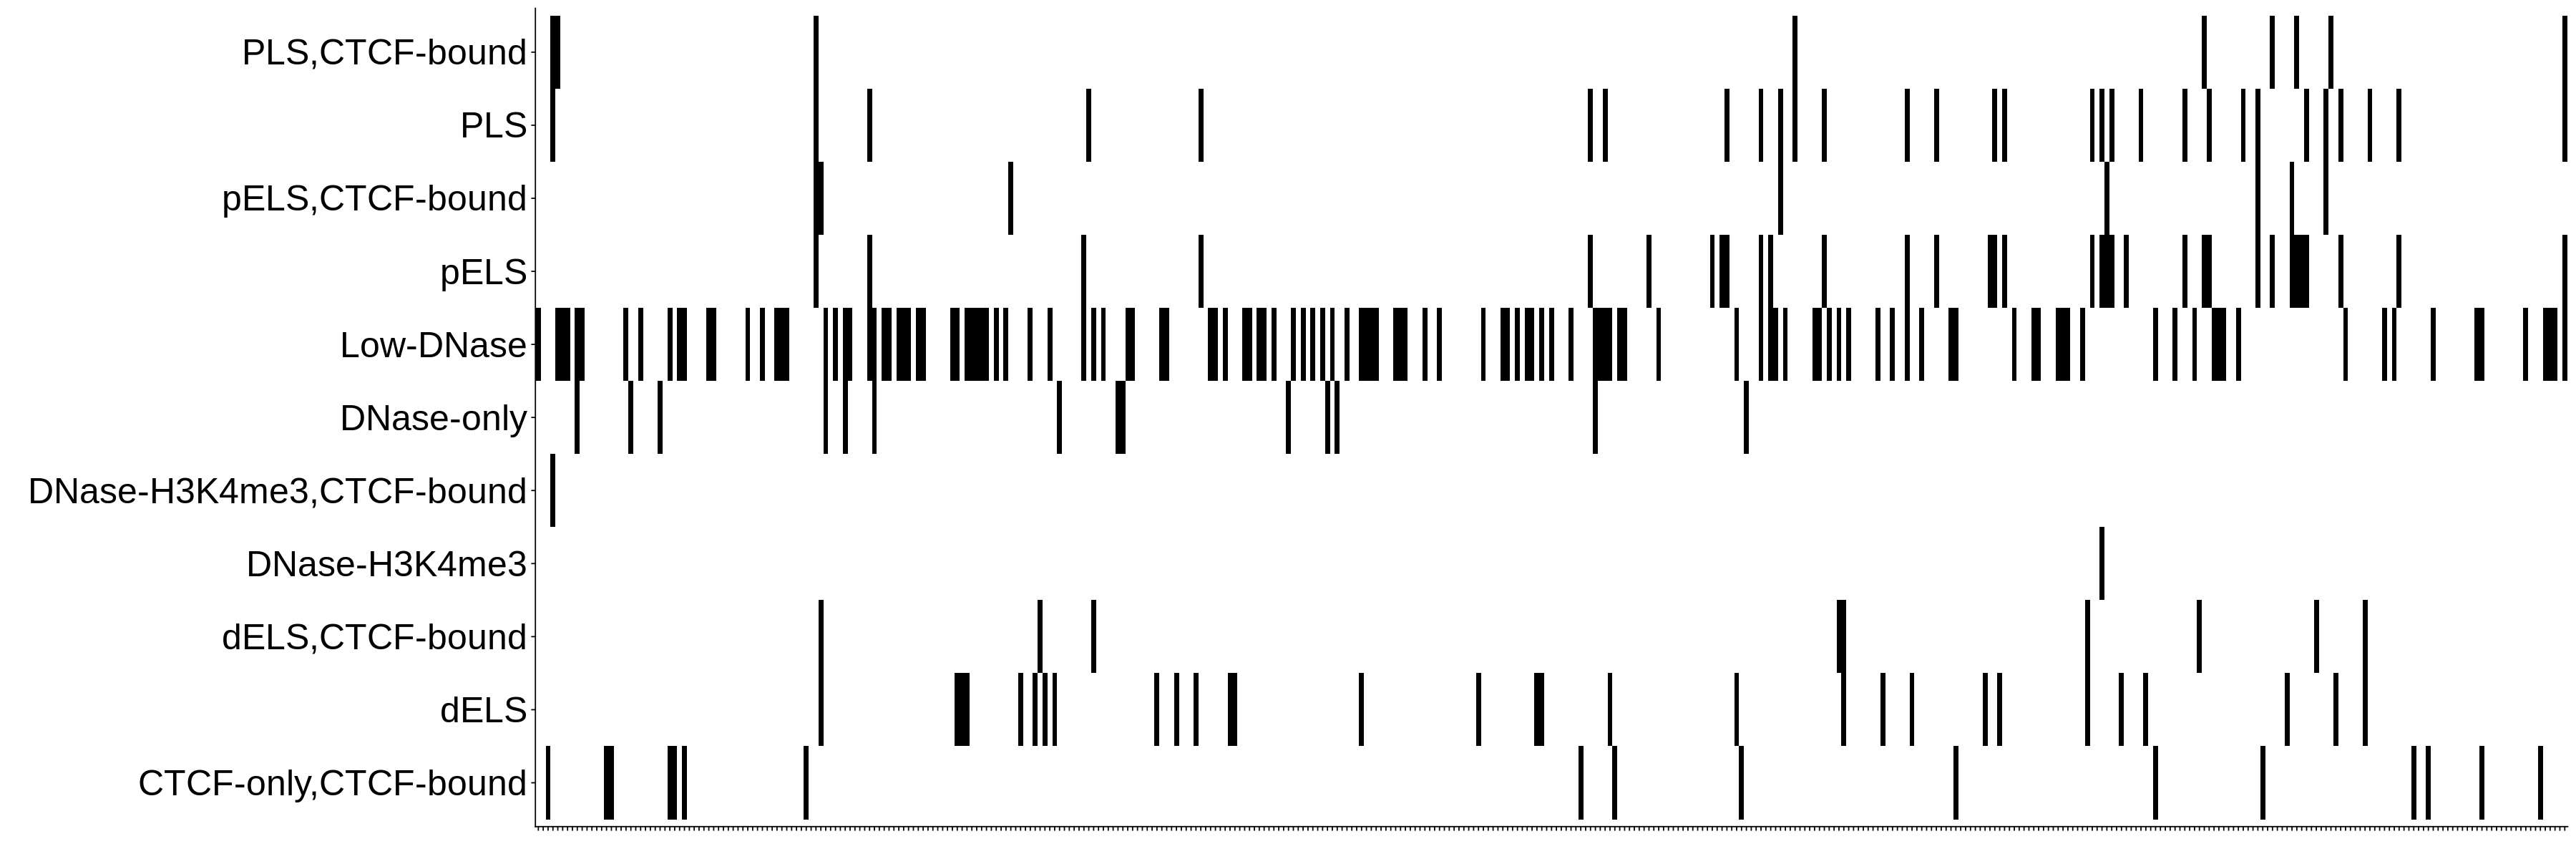

In [60]:
gpt = ggplot(dat, aes(x=Peak, y=CCRE, fill=Label)) +
    geom_tile() +
    scale_fill_manual(values = c("1" = "black", "0" = "white")) +
    labs(x="", y="") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=30),
          legend.position = "none")
    

options(repr.plot.height=10, repr.plot.width=30)
print(gpt)

In [26]:
dat = dat_peak_freq_ccre %>% dplyr::select(Peak, CCRE)
dat = left_join(dat_region, dat, by="Peak")%>% mutate(Count = 1)
dat = dat %>% spread(CCRE, Count)
head(dat)

Chrom,Start,End,Peak,Region,CCRE
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,NA
chr8,126782925,126783318,chr8_126782925_126783318,MYC,NA
chr8,126804776,126805825,chr8_126804776_126805825,MYC,DNase-only
chr8,126817018,126817490,chr8_126817018_126817490,MYC,NA
chr8,126820465,126821393,chr8_126820465_126821393,MYC,"CTCF-only,CTCF-bound"
chr8,126820465,126821393,chr8_126820465_126821393,MYC,Low-DNase


In [9]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv" 
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_freq_ccre = dat
print(dim(dat))
head(dat)

[1] 120179      9


Peak,Chrom,Start,End,Len,Label,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100027983_100029702,chr1,100027983,100029702,1719,Low-DNase,1,1,1.0000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,Low-DNase,2,6,0.3333333
chr1_100036871_100039191,chr1,100036871,100039191,2320,pELS,3,6,0.5000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,PLS,1,6,0.1666667
chr1_100048234_100048985,chr1,100048234,100048985,751,Low-DNase,1,1,1.0000000
chr1_100049562_100050540,chr1,100049562,100050540,978,Low-DNase,1,1,1.0000000
